# Bank Turnover Dataset

Can you predict if bank customers will turnover next cycle?

https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling


In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3345,3346,15648320,Heller,658,France,Female,31,7,123974.96,1,1,0,102153.75,0
9897,9898,15810563,Ho,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0
155,156,15679145,Chou,706,Spain,Male,57,7,0.00,1,1,0,17941.16,1
4855,4856,15671148,Barry,490,Germany,Male,33,5,96341.00,2,0,0,108313.34,0
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1


In [13]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Drop RowNumber, CustomerId and Surname columns

In [20]:
df.drop('RowNumber',axis='columns',inplace=True)

In [21]:
df.drop('CustomerId', axis='columns', inplace=True)

In [22]:
df.drop('Surname', axis='columns', inplace=True)

In [23]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [24]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

## Plot correlation between Tenure and Exited

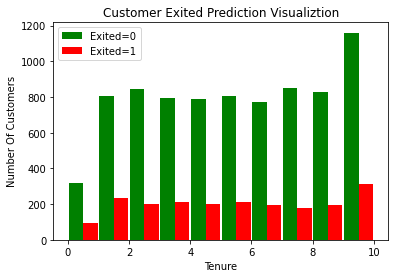

In [26]:
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes = df[df.Exited == 1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([tenure_exited_no, tenure_exited_yes], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.legend()

## Plot correlation between Balance and Exited

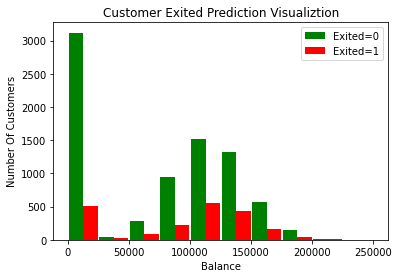

In [27]:
tenure_exited_no = df[df.Exited == 0].Balance
tenure_exited_yes = df[df.Exited == 1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion")

plt.hist([tenure_exited_no, tenure_exited_yes], rwidth=0.95, color=['green','red'],label=['Exited=0','Exited=1'])
plt.legend()

In [40]:
len(df[(df.Exited == 0) & (df.Balance == 0)]) / len(df) * 100

31.169999999999998

Note: There is a high number of customers (31%) have a balance of 0 but didn't exit.

## Replace Female and Male in the Gender column with 0 and 1

In [41]:
df.Gender.replace({'Female':1, 'Male':0}, inplace=True)

## One hot encoding the Geography column

In [45]:
df_with_dummies = pd.get_dummies(data=df, columns=['Geography'])
df_with_dummies.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2290,658,0,50,2,0.00,2,1,0,52137.73,0,0,0,1
1267,837,0,38,2,126732.85,1,1,1,79577.38,0,0,1,0
6017,487,1,34,2,96019.50,1,0,0,9085.00,0,1,0,0


## Scale CreditScore, Age, Balance, EstimatedSalary between 0 and 1

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_with_dummies_and_scaled = df_with_dummies
df_with_dummies_and_scaled[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df_with_dummies[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

df_with_dummies_and_scaled.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2481,0.250,1,0.527027,1,0.00000,2,1,0,0.446230,0,1,0,0
8018,0.564,0,0.067568,3,0.48816,1,1,0,0.736166,1,0,1,0
9562,0.776,0,0.283784,5,0.00000,2,1,1,0.571942,0,1,0,0


## Split data in traing and test data

In [54]:
final_df = df_with_dummies_and_scaled

X = final_df.drop('Exited',axis='columns')
y = final_df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [55]:
x_train.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
3672,0.800,0,0.337838,6,0.453899,1,1,1,0.372800,1,0,0
9311,0.470,0,0.432432,2,0.501581,1,1,0,0.047143,0,1,0
7528,0.456,0,0.378378,5,0.451285,1,1,0,0.283823,1,0,0


In [56]:
len(x_train)

8000

In [57]:
len(x_test)

2000

In [59]:
y_train

7751    0
4154    0
3881    0
9238    0
5210    0
       ..
3046    1
9917    1
4079    0
2254    0
2915    1
Name: Exited, Length: 8000, dtype: int64

## Build the model in tensorflow

In [60]:
len(x_train.columns)

12

In [70]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6389 - accuracy: 0.6486
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4585 - accuracy: 0.7961
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.8014
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.8033
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8081
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8109
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8155
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4245 - accura

In [72]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8535


[0.3533301055431366, 0.8535000085830688]

In [73]:
y_pred = []
for element in model.predict(x_test):
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.74      0.42      0.54       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

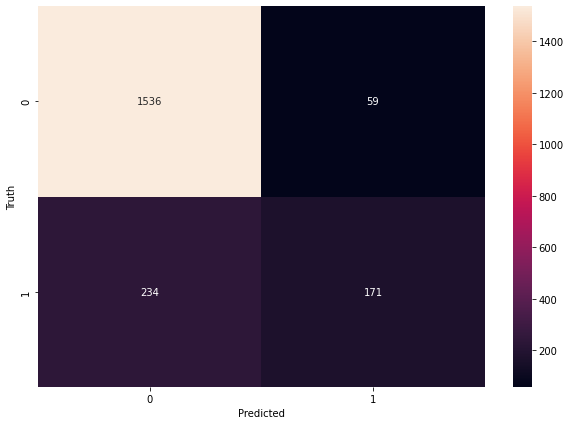

In [77]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')